Imports and Loads

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


#lyrics datasets
artists_data_df = pd.read_csv('DATASETS/artists-data.csv')
lyrics_data_df = pd.read_csv('DATASETS/lyrics-data.csv')

lyrics_raw_2 = pd.read_csv("DATASETS/labeled_lyrics_cleaned.csv", index_col=[0])


#audio features dataset
audio_raw = pd.read_csv('DATASETS/SpotifyFeatures.csv')

TODO-list:

- Create dataframes with Artist+Song columns (S)
- Check lyrics of both data sets and find in Spotify features dataset, joint data (S)
- Analyze joint data instead (S)
- Baseline audio (M)
- Baseline text (L)

### Data Preparation

First we want to check for unique values and joint datapoints between the lyrics datasets and the audio features dataset.

I went back and implemented some lower casing as well.
Since we have multiple datasets with some variations in the casing of all names I lower cased all artist_and_song columns (which increased the matches of datapoints between the datasets).

In [90]:
audio_raw['artist_and_song'] = audio_raw.artist_name + ' /// ' + audio_raw.track_name
audio_raw['artist_and_song'] = audio_raw.artist_and_song.str.lower()
audio_raw.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_and_song
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,henri salvador /// c'est beau de faire un show
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,martin & les fées /// perdu d'avance (par gad ...
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,joseph williams /// don't let me be lonely ton...
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,henri salvador /// dis-moi monsieur gordon cooper
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,fabien nataf /// ouverture


In [91]:
lyrics_data_df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [92]:
artists_data_df.head()

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/


In [93]:
A = artists_data_df.Artist.unique()
B = artists_data_df.Link.unique()

print(A[:3],B[:3])

mapping = dict(zip(B, A))

['Ivete Sangalo' 'Chiclete com Banana' 'Banda Eva'] ['/ivete-sangalo/' '/chiclete-com-banana/' '/banda-eva/']


In [94]:
lyrics_data_df['ALink'] = lyrics_data_df['ALink'].map(mapping)
lyrics_data_df.head()

,ALink,SName,SLink,Lyric,language
0,Ivete Sangalo,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [95]:
lyrics_data_df['artist_and_song'] = lyrics_data_df.ALink + ' /// ' + lyrics_data_df.SName
lyrics_data_df['artist_and_song'] = lyrics_data_df['artist_and_song'].str.lower()
lyrics_raw_1 = lyrics_data_df.copy() #change the variable to make it more readable from now on
lyrics_raw_1 = lyrics_raw_1.drop_duplicates(subset='artist_and_song', keep='first') #remove duplicates

lyrics_raw_1.head()

,ALink,SName,SLink,Lyric,language,artist_and_song
0,Ivete Sangalo,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,ivete sangalo /// arerê
1,Ivete Sangalo,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,ivete sangalo /// se eu não te amasse tanto assim
2,Ivete Sangalo,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,ivete sangalo /// céu da boca
3,Ivete Sangalo,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,ivete sangalo /// quando a chuva passar
4,Ivete Sangalo,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,ivete sangalo /// sorte grande


In [96]:
artists_and_songs_1 = lyrics_raw_1.artist_and_song.unique()


In [97]:
lyrics_raw_2.head()

,artist,seq,song,label
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371


In [98]:
lyrics_raw_2['artist_and_song'] = lyrics_raw_2.artist + ' /// ' + lyrics_raw_2.song
lyrics_raw_2['artist_and_song'] = lyrics_raw_2.artist_and_song.str.lower() 
lyrics_raw_2 = lyrics_raw_2.drop_duplicates(subset='artist_and_song', keep='first') #remove duplicates

lyrics_raw_2.head()

,artist,seq,song,label,artist_and_song
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,elijah blake /// everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630,elijah blake /// live till we die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240,elijah blake /// the otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536,elijah blake /// pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,elijah blake /// shadows & diamonds


In [99]:
artists_and_songs_2 = lyrics_raw_2.artist_and_song.unique()
print(len(artists_and_songs_2))

158311


In [100]:
audio_text_raw_1 = audio_raw.loc[audio_raw.artist_and_song.isin(artists_and_songs_1)]
audio_text_raw_2 = audio_raw.loc[audio_raw.artist_and_song.isin(artists_and_songs_2)]

In [101]:
audio_text_raw_1.genre.value_counts()

Rock                3743
Dance               3261
Alternative         3158
Pop                 3059
Children’s Music    2991
Folk                2060
Rap                 2000
R&B                 1574
Blues               1551
Indie               1551
Hip-Hop             1464
Ska                 1395
Country             1297
Soul                1203
Electronic           956
Reggae               856
Jazz                 661
World                538
Reggaeton            457
Classical            243
Anime                236
Comedy                26
Movie                 19
Soundtrack            18
Opera                  8
Children's Music       1
Name: genre, dtype: int64

In [102]:
audio_text_raw_2.genre.value_counts()

Country             1626
Rock                1603
Alternative         1581
Children’s Music    1570
Folk                1369
Blues               1183
Dance               1117
Pop                  989
Indie                982
R&B                  928
Soul                 914
Rap                  848
Ska                  787
Hip-Hop              631
Jazz                 581
Electronic           385
Reggae               248
World                223
Movie                148
Children's Music      61
Classical             48
Comedy                35
Soundtrack            32
Opera                 17
Reggaeton             16
Anime                 11
A Capella              7
Name: genre, dtype: int64

In [103]:
audio_text_raw = audio_raw.loc[
    (audio_raw.artist_and_song.isin(artists_and_songs_1)) | (audio_raw.artist_and_song.isin(artists_and_songs_2))
    ]
audio_text_raw.genre.value_counts()

Rock                4425
Alternative         3778
Dance               3750
Children’s Music    3621
Pop                 3530
Folk                2818
Country             2434
Rap                 2391
Blues               2334
R&B                 2155
Indie               2070
Hip-Hop             1840
Ska                 1835
Soul                1830
Electronic          1182
Jazz                1061
Reggae              1044
World                675
Reggaeton            465
Classical            266
Anime                242
Movie                153
Children's Music      62
Comedy                43
Soundtrack            43
Opera                 24
A Capella              7
Name: genre, dtype: int64

### Data Analysis

Okay it seemed to work. We found some overlapping datapoints from the audio features dataset with the lyrics datasets. Even though the amount may not be sufficient for a state of the art genre classifier, it should be enough to suffice the goal of this project!

Let us already remove the genres that really is not a music genre or that have less datapoints in the lyricsdatasets. I will remove everything below World for now. Even though the lyrical classifier may have a better time identyfying Reggaeton and World because of their nature (they are often in other languages than english). I may come back and change this later if time allows. 

Fewer labels also makes the analysing a bit easier.

In [115]:
audio_text_raw = audio_text_raw[
    ~audio_text_raw.genre.isin( 
        ['Children\'s Music', 'A Capella', 'Soundtrack', 'Movie', 'Classical',
         'Anime', 'Comedy', 'Opera', 'Reggaeton', 'World'
        ])] 
# I also removed the smaller Children's Music class, because of the duplicate genre label
# (maybe some error when the person who made the dataset scraped the songs)

audio_text_raw.genre.value_counts()


Rock                4425
Alternative         3778
Dance               3750
Children’s Music    3621
Pop                 3530
Folk                2818
Country             2434
Rap                 2391
Blues               2334
R&B                 2155
Indie               2070
Hip-Hop             1840
Ska                 1835
Soul                1830
Electronic          1182
Jazz                1061
Reggae              1044
Name: genre, dtype: int64

In [105]:
print(' datapoints: ', len(audio_text_raw) , '\n unique artist_songs: ' ,len(audio_text_raw.artist_and_song.unique()))

 datapoints:  43238 
 unique artist_songs:  24953


We may have many songs with multiple genres as labels in our audio features dataset.

In [106]:
lyrics_1 = lyrics_raw_1.Lyric.unique()
print(' unique artist_songs in lyrics dataset 1: ', len(artists_and_songs_1), 
            '\n unique lyrics in lyrics dataset 1: ', len(lyrics_1))

lyrics_2 = lyrics_raw_2.seq.unique()
print(' unique artist_songs in lyrics dataset 2: ', len(artists_and_songs_2), 
            '\n unique lyrics in lyrics dataset 2: ', len(lyrics_2))

 unique artist_songs in lyrics dataset 1:  378951 
 unique lyrics in lyrics dataset 1:  370268
 unique artist_songs in lyrics dataset 2:  158311 
 unique lyrics in lyrics dataset 2:  135965


We can see that some song lyrics are the same even though the artist_song differ. This means that we have covers included in the dataset that we need to take care of. Unfortunatly songs with covers are most likely popular/famous songs that has a joint datapoint with the audio features dataset, but since there is not a way to know which song that is the original or which genre it was meant to be when the lyrics were written, I will remove ALL artist_songs that have duplicate lyrics (including the original artist_song)

In [107]:
lyrics_raw_1 = lyrics_raw_1.drop_duplicates(subset='Lyric', keep=False)
lyrics_raw_2 = lyrics_raw_2.drop_duplicates(subset='seq', keep=False)
#print(len(lyrics_raw_2))

lyrics_1 = lyrics_raw_1.Lyric.unique()
artists_and_songs_1 = lyrics_raw_1.artist_and_song.unique()
print(' unique artist_songs in lyrics dataset 1: ', len(artists_and_songs_1), 
            '\n unique lyrics in lyrics dataset 1: ', len(lyrics_1))

lyrics_2 = lyrics_raw_2.seq.unique()
artists_and_songs_2 = lyrics_raw_2.artist_and_song.unique()
print(' unique artist_songs in lyrics dataset 2: ', len(artists_and_songs_2), 
            '\n unique lyrics in lyrics dataset 2: ', len(lyrics_2))

 unique artist_songs in lyrics dataset 1:  366137 
 unique lyrics in lyrics dataset 1:  366137
 unique artist_songs in lyrics dataset 2:  130031 
 unique lyrics in lyrics dataset 2:  130031


In [108]:
temp = audio_text_raw[['artist_and_song', 'genre' ]].groupby('artist_and_song').count().reset_index()
df_multiples = temp.loc[temp['genre'] > 1]
df_uniques = temp.loc[temp['genre'] == 1]
df_multiples.head()

,artist_and_song,genre
0,*nsync /// bye bye bye,2
4,*nsync /// it's gonna be me,2
6,"*nsync /// merry christmas, happy holidays",2
8,*nsync /// pop,2
10,*nsync /// this i promise you,2


In [109]:
print('unique songs with multiple genre labels: ' ,len(df_multiples))
print('unique songs with only one genre label: ', len(df_uniques))

unique songs with multiple genre labels:  10721
unique songs with only one genre label:  14232


Almost half of the joint-dataset has multiple labels. So I will have to further investigate how  distributions of overlap between genres look like.

In [110]:
genres = audio_text_raw.genre.unique()
genres

array(['R&B', 'Alternative', 'Country', 'Dance', 'Electronic', 'Folk',
       'Blues', 'Hip-Hop', 'Children’s Music', 'Rap', 'Indie', 'Pop',
       'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Soul', 'World'],
      dtype=object)

In [111]:
overlap_values = np.zeros(len(genres))
stats = {genre : overlap_values for genre in genres}

for artist_song in audio_text_raw.artist_and_song.unique():
        
    mini_df = audio_text_raw.loc[audio_text_raw.artist_and_song == artist_song]
    mini_genre_list = mini_df.genre.unique()
    overlap_values = np.in1d(genres, mini_genre_list) * 1
    for mini_genre in mini_genre_list:
        old_val = stats[mini_genre]
        stats[mini_genre] = (overlap_values + old_val)

#stats #here you can plot the stats also

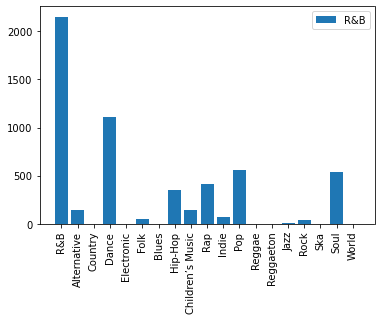

<Figure size 432x288 with 0 Axes>

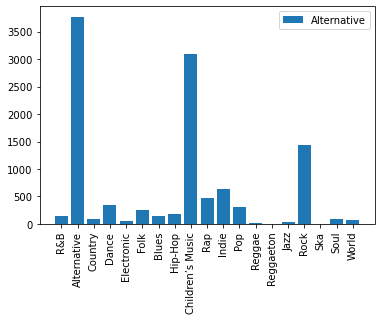

<Figure size 432x288 with 0 Axes>

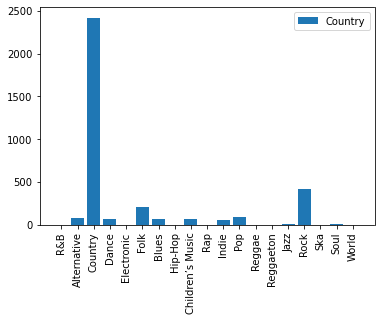

<Figure size 432x288 with 0 Axes>

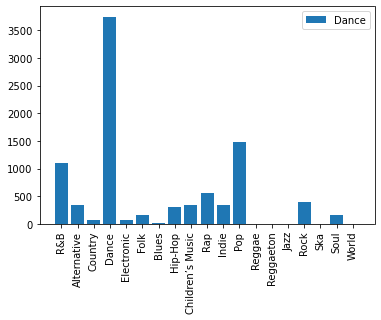

<Figure size 432x288 with 0 Axes>

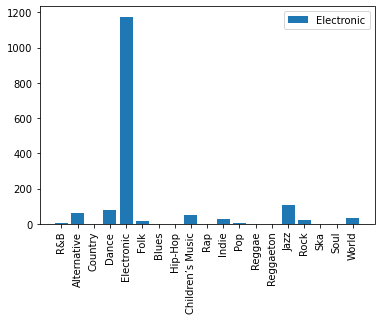

<Figure size 432x288 with 0 Axes>

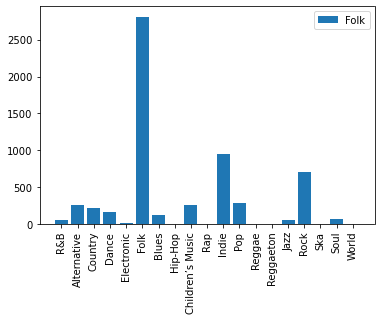

<Figure size 432x288 with 0 Axes>

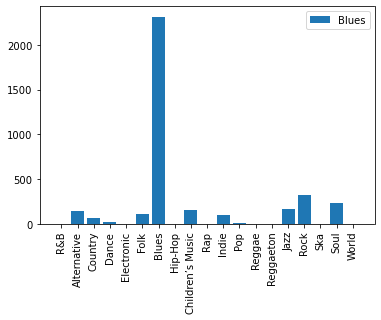

<Figure size 432x288 with 0 Axes>

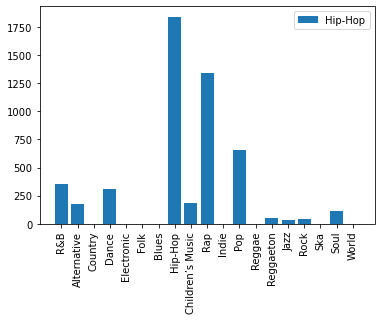

<Figure size 432x288 with 0 Axes>

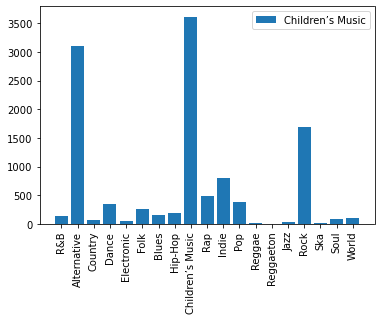

<Figure size 432x288 with 0 Axes>

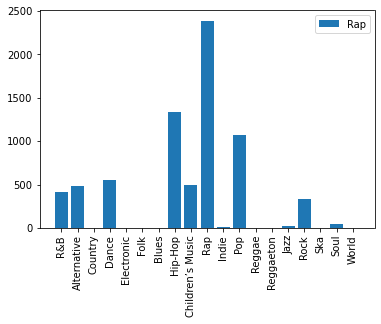

<Figure size 432x288 with 0 Axes>

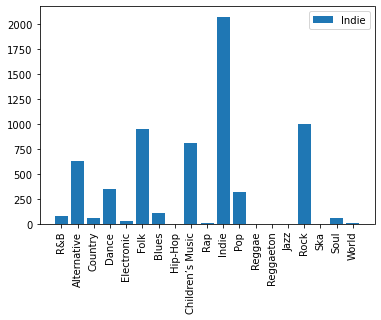

<Figure size 432x288 with 0 Axes>

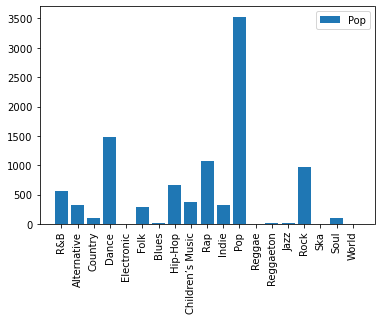

<Figure size 432x288 with 0 Axes>

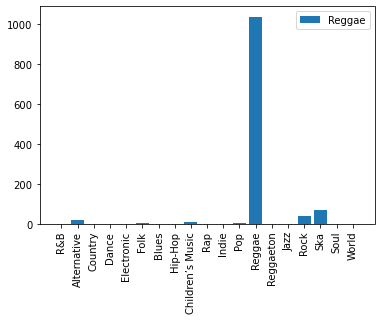

<Figure size 432x288 with 0 Axes>

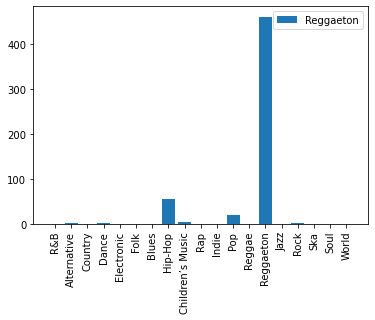

<Figure size 432x288 with 0 Axes>

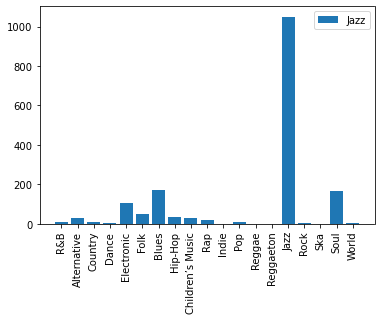

<Figure size 432x288 with 0 Axes>

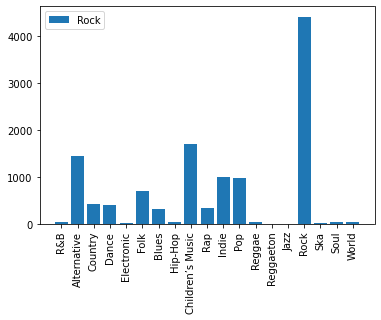

<Figure size 432x288 with 0 Axes>

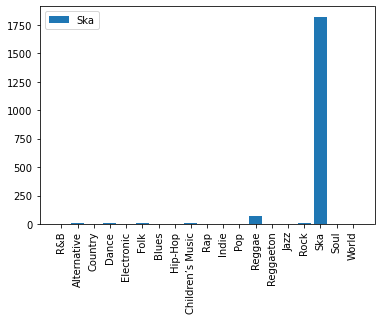

<Figure size 432x288 with 0 Axes>

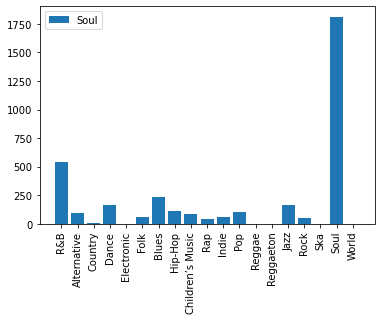

<Figure size 432x288 with 0 Axes>

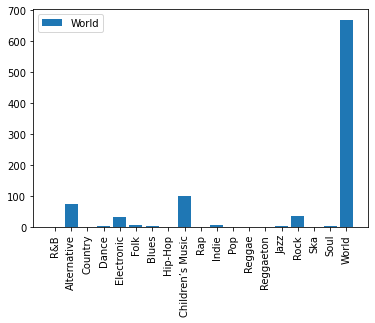

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [112]:
for genre in genres:

    # Plot the sizes as a bar plot
    plt.bar(genres, stats[genre])

    #plt.legend(genres, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.legend([genre])

    plt.xticks(rotation=90)
    plt.show()
    display(plt.gcf())
    plt.clf()


Above I have plotted how many songs and which genres that have common target label. The chosen genre for every plot also has itself as a bar in the plot which shows the total number of datapoints that genre has.

As we can see Alternative and Children's music have a lot of overlap and should maybe considered as one class. I will therefore remove Alternative because it seems to be used as an umberella term instead of the actual Alternative music genre (it is not usually Children's music that you call Alternative I realised after google:ing)

There is big correlation between Hip Hop and Rap but they can still be considered two be separate classes. (Most likely that a lot of Hip Hop uses Rap, but not every Rap song is Hip Hop given my previous biases and knowledge)

Some takeaways from the plots:

- Alternative and Children's music have a lot of overlap
- A lot of classes that seem to have much less overlap such as World, Ska and Jazz for example. 
- There is big correlation between Hip Hop and Rap. 
- The bigger classes such as Rock, Indie and Pop has a lot of overlaps with other genres.

My conclusion is that I have to keep the multilabels and I will construct a scoring system appropriately or multilabel classification.

### Building the Final Dataset ###

In [123]:
audio_text_raw = audio_text_raw[
    ~audio_text_raw.genre.isin( 
        ['Alternative',
        ])]


In [169]:
genres = audio_text_raw.genre.unique() #update variable
audio_text_raw.artist_and_song.describe()

count                                 38320
unique                                23548
top       todd rundgren /// i saw the light
freq                                      8
Name: artist_and_song, dtype: object

I will remove the popularity column since it is not an audiofeature and some songs had multiple datapoints with different popularity values even though it was the same song.

In [145]:
df = audio_text_raw.copy()
cols = df.columns.tolist()
cols.remove('genre')
cols.remove('popularity')
df = df.groupby(cols)['genre'].apply(lambda x: [i for i in x])
df = df.reset_index()
df.rename(columns={0: "genre"}, inplace=True)
df.head()
audio_text_df = df.drop(['track_id', 'track_name', 'artist_name'], axis=1)

audio_text_df.artist_and_song.describe()

count                                        23799
unique                                       23548
top       the black crowes /// she talks to angels
freq                                             3
Name: artist_and_song, dtype: object

In [146]:
audio_text_df.loc[audio_text_df.artist_and_song=='the black crowes /// she talks to angels']

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_and_song,genre
20069,0.0600,0.584,329400,0.521,0.000076,E,0.220,-5.782,Major,0.0295,160.058,4/4,0.317,the black crowes /// she talks to angels,[Blues]
20070,0.0553,0.586,329600,0.514,0.000050,E,0.202,-5.772,Major,0.0283,160.094,4/4,0.334,the black crowes /// she talks to angels,"[Children’s Music, Rock]"
20071,0.2530,0.380,376960,0.340,0.001780,E,0.305,-12.599,Major,0.0307,145.990,4/4,0.182,the black crowes /// she talks to angels,[Blues]


We can see that some some artist_and_song values are the same but contain different audio features. (Maybe different versions or something.)
Since these datapoints are very few I will remove them altoghether.

In [167]:
audio_text_df = audio_text_df.drop_duplicates(subset='artist_and_song', keep=False)
audio_text_df.artist_and_song.describe()[:2]

count     23303
unique    23303
Name: artist_and_song, dtype: object

In [166]:
lyrics_df = lyrics_raw_1[['artist_and_song', 'Lyric']].append(lyrics_raw_2[['artist_and_song', 'seq']].rename(columns = {'seq':'Lyric'} ) )
lyrics_df = lyrics_df.drop_duplicates(subset='artist_and_song', keep='first')
lyrics_df.artist_and_song.describe()[:2]

count     465998
unique    465998
Name: artist_and_song, dtype: object

In [158]:
artist_song_lyrics_mapping = dict(zip(lyrics_df.artist_and_song, lyrics_df.Lyric))

In [168]:
audio_text_df['Lyrics'] = audio_text_df.artist_and_song.map(artist_song_lyrics_mapping)
audio_text_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_and_song,genre,Lyrics
0,0.03100,0.610,200400,0.926,0.001200,G#,0.0821,-4.843,Minor,0.0479,172.638,4/4,0.861,*nsync /// bye bye bye,"[Dance, Pop]","(Hey, Hey)\nBye, Bye, Bye\nBye, Bye\nBye, Bye\..."
1,0.08660,0.748,253600,0.811,0.000015,C,0.0282,-5.213,Minor,0.0907,93.963,4/4,0.862,*nsync /// girlfriend,[Dance],Would you be my girlfriend?\nWould you be my g...
2,0.43000,0.704,292000,0.409,0.000000,B,0.1090,-8.581,Minor,0.0597,113.863,4/4,0.495,*nsync /// gone,[Dance],"There's a thousand words that I could say,\nTo..."
3,0.00993,0.810,206333,0.857,0.000011,E,0.0528,-4.658,Minor,0.0881,104.502,4/4,0.646,*nsync /// it makes me ill,[Dance],Justin:\nI was hanging with the fellas\nSaw yo...
4,0.04070,0.636,192427,0.873,0.000001,C,0.0372,-4.672,Minor,0.0710,165.071,4/4,0.908,*nsync /// it's gonna be me,"[Dance, Pop]",You might be hurt babe\nThat ain't no lie\nYou...


Lastly fix the key, mode and time_signature columns to have numbers instead of strings and we can start on our multiclass classifier!

In [170]:
for col in ['key', 'mode', 'time_signature']:
    unique_values = list(audio_text_df[col].unique())
    print(unique_values)
    audio_text_df[col] = audio_text_df[col].map(lambda x: unique_values.index(x) / len(unique_values))

print(audio_text_df.dtypes)
print
audio_text_df.head()

['G#', 'C', 'B', 'E', 'F', 'G', 'A', 'D', 'C#', 'A#', 'D#', 'F#']
['Minor', 'Major']
['4/4', '3/4', '5/4', '1/4', '0/4']
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
artist_and_song      object
genre                object
Lyrics               object
dtype: object


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_and_song,genre,Lyrics
0,0.03100,0.610,200400,0.926,0.001200,0.000000,0.0821,-4.843,0.0,0.0479,172.638,0.0,0.861,*nsync /// bye bye bye,"[Dance, Pop]","(Hey, Hey)\nBye, Bye, Bye\nBye, Bye\nBye, Bye\..."
1,0.08660,0.748,253600,0.811,0.000015,0.083333,0.0282,-5.213,0.0,0.0907,93.963,0.0,0.862,*nsync /// girlfriend,[Dance],Would you be my girlfriend?\nWould you be my g...
2,0.43000,0.704,292000,0.409,0.000000,0.166667,0.1090,-8.581,0.0,0.0597,113.863,0.0,0.495,*nsync /// gone,[Dance],"There's a thousand words that I could say,\nTo..."
3,0.00993,0.810,206333,0.857,0.000011,0.250000,0.0528,-4.658,0.0,0.0881,104.502,0.0,0.646,*nsync /// it makes me ill,[Dance],Justin:\nI was hanging with the fellas\nSaw yo...
4,0.04070,0.636,192427,0.873,0.000001,0.083333,0.0372,-4.672,0.0,0.0710,165.071,0.0,0.908,*nsync /// it's gonna be me,"[Dance, Pop]",You might be hurt babe\nThat ain't no lie\nYou...


WE MAY NEED TO DO SOME LYRICS DATA CLEANING LATER ALSO

Lets save this to a CSV-file and continue on a new notebook!

In [171]:
audio_text_df.to_csv('./DATASETS/Project_dataset.csv', index = False)